In [1]:
from tpot import TPOTClassifier
from sklearn.cross_validation import train_test_split
import pandas as pd 
import numpy as np

/home/fd/Dev/siraj/dschallenges/.env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load the data
global_temperatures = pd.read_csv('GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

In [3]:
#clean the data
argentina_temperatures = global_temperatures[global_temperatures['Country']=='Argentina']
argentina_temperatures_shuffled = argentina_temperatures.iloc[np.random.permutation(len(argentina_temperatures))]
arg = argentina_temperatures_shuffled.reset_index(drop=True)

In [4]:
from datetime import date, datetime
arr = np.asarray(argentina_temperatures[['dt']]).reshape(len(argentina_temperatures))
last_date = datetime.strptime(arr[0], '%Y-%m-%d').date()
date_numbers = [(
    datetime.strptime(d, '%Y-%m-%d').date().year,
) for d in arr]
argentina_temperatures[['dt']] = np.asarray(date_numbers)

/home/fd/Dev/siraj/dschallenges/.env/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fd/Dev/siraj/dschallenges/.env/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


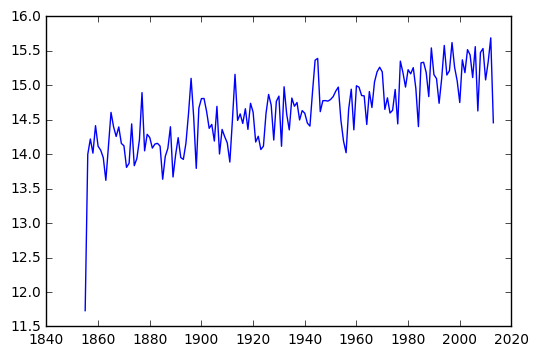

In [5]:
argentina_temperatures.groupby('dt')['AverageTemperature'].mean().values
from matplotlib import pyplot as plt
%matplotlib inline

X = (argentina_temperatures.groupby('dt')['AverageTemperature'].mean().index)
Y = (argentina_temperatures.groupby('dt')['AverageTemperature'].mean().values)
plt.plot(X,Y)


In [6]:
df = pd.read_csv('magic04.data').to_csv('MAGIC Gamma Telescope Data.csv', index=False)

In [38]:
#Split training, testing, and validation data
X = np.asarray(X).reshape(X.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [44]:
#Let Genetic Programming find best ML model and hyperparameters
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, verbosity=2)

tpot.fit(X_train, y_train)

#Score the accuracy
tpot.score(X_test, y_test)

Optimization Progress:   1%|          | 100/10100 [01:10<3:20:41,  1.20s/pipeline]

Generation 1 - Current best internal CV score: 0.10099142330235152


Optimization Progress:   2%|▏         | 208/10100 [01:25<16:55,  9.74pipeline/s]  

Generation 2 - Current best internal CV score: 0.09893940632893668


Optimization Progress:   3%|▎         | 289/10100 [01:48<24:26,  6.69pipeline/s]  

Generation 3 - Current best internal CV score: 0.09893940632893668


Optimization Progress:   4%|▍         | 401/10100 [02:02<20:10,  8.01pipeline/s]

Generation 4 - Current best internal CV score: 0.09893940632893668


Optimization Progress:   5%|▍         | 494/10100 [02:15<16:16,  9.84pipeline/s]

Generation 5 - Current best internal CV score: 0.09893940632893668


Optimization Progress:   6%|▌         | 602/10100 [02:29<20:37,  7.67pipeline/s]  

Generation 6 - Current best internal CV score: 0.09893940632893668


Optimization Progress:   7%|▋         | 704/10100 [02:36<03:30, 44.61pipeline/s]

Generation 7 - Current best internal CV score: 0.09893940632893668


Optimization Progress:   8%|▊         | 803/10100 [02:46<12:24, 12.48pipeline/s]

Generation 8 - Current best internal CV score: 0.09893940632893666


Optimization Progress:   9%|▉         | 902/10100 [03:03<12:44, 12.04pipeline/s]  

Generation 9 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  10%|▉         | 1001/10100 [03:15<19:30,  7.77pipeline/s]

Generation 10 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  11%|█         | 1104/10100 [03:22<16:29,  9.09pipeline/s]

Generation 11 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  12%|█▏        | 1201/10100 [03:37<24:19,  6.10pipeline/s]

Generation 12 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  13%|█▎        | 1305/10100 [03:52<06:27, 22.71pipeline/s]  

Generation 13 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  14%|█▎        | 1386/10100 [04:06<42:45,  3.40pipeline/s]  

Generation 14 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  15%|█▍        | 1501/10100 [04:15<11:36, 12.34pipeline/s]

Generation 15 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  16%|█▌        | 1601/10100 [04:32<05:57, 23.80pipeline/s]  

Generation 16 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  17%|█▋        | 1687/10100 [04:39<12:48, 10.95pipeline/s]

Generation 17 - Current best internal CV score: 0.09893940632893666


Optimization Progress:  18%|█▊        | 1805/10100 [04:52<09:16, 14.92pipeline/s]

Generation 18 - Current best internal CV score: 0.09697463117323128


Optimization Progress:  19%|█▉        | 1903/10100 [05:08<12:42, 10.75pipeline/s]  

Generation 19 - Current best internal CV score: 0.09697463117323128


Optimization Progress:  20%|█▉        | 2004/10100 [05:21<15:12,  8.87pipeline/s]

Generation 20 - Current best internal CV score: 0.09697463117323128


Optimization Progress:  21%|██        | 2101/10100 [05:33<07:07, 18.72pipeline/s]

Generation 21 - Current best internal CV score: 0.09506815264391079


Optimization Progress:  22%|██▏       | 2203/10100 [05:51<39:19,  3.35pipeline/s]  

Generation 22 - Current best internal CV score: 0.0948829794059876


Optimization Progress:  23%|██▎       | 2301/10100 [06:01<04:54, 26.51pipeline/s]

Generation 23 - Current best internal CV score: 0.0948829794059876


Optimization Progress:  24%|██▍       | 2403/10100 [06:23<14:27,  8.87pipeline/s]

Generation 24 - Current best internal CV score: 0.09429147032645097


Optimization Progress:  25%|██▍       | 2501/10100 [06:39<16:08,  7.85pipeline/s]  

Generation 25 - Current best internal CV score: 0.09311372788688237


Optimization Progress:  26%|██▌       | 2605/10100 [06:55<19:00,  6.57pipeline/s]

Generation 26 - Current best internal CV score: 0.09311372788688237


Optimization Progress:  27%|██▋       | 2705/10100 [07:04<04:48, 25.64pipeline/s]

Generation 27 - Current best internal CV score: 0.09311372788688237


Optimization Progress:  28%|██▊       | 2801/10100 [07:12<20:48,  5.85pipeline/s]

Generation 28 - Current best internal CV score: 0.09311372788688237


Optimization Progress:  29%|██▊       | 2900/10100 [07:17<05:02, 23.83pipeline/s]

Generation 29 - Current best internal CV score: 0.09310966721942622


Optimization Progress:  30%|██▉       | 3003/10100 [07:32<09:02, 13.08pipeline/s]

Generation 30 - Current best internal CV score: 0.09310966721942622


Optimization Progress:  31%|███       | 3101/10100 [07:38<03:40, 31.68pipeline/s]

Generation 31 - Current best internal CV score: 0.09310966721942622


Optimization Progress:  32%|███▏      | 3201/10100 [07:52<09:51, 11.66pipeline/s]

Generation 32 - Current best internal CV score: 0.09310966721942622


Optimization Progress:  33%|███▎      | 3301/10100 [08:08<25:00,  4.53pipeline/s]

Generation 33 - Current best internal CV score: 0.09310966721942622


Optimization Progress:  34%|███▎      | 3401/10100 [08:13<07:08, 15.65pipeline/s]

Generation 34 - Current best internal CV score: 0.09310966721942622


Optimization Progress:  35%|███▍      | 3504/10100 [08:23<07:53, 13.94pipeline/s]

Generation 35 - Current best internal CV score: 0.09310857524559968


Optimization Progress:  36%|███▌      | 3601/10100 [08:33<12:49,  8.45pipeline/s]

Generation 36 - Current best internal CV score: 0.09310857524559968


Optimization Progress:  37%|███▋      | 3700/10100 [08:54<13:55,  7.66pipeline/s]  

Generation 37 - Current best internal CV score: 0.09310720629766156


Optimization Progress:  38%|███▊      | 3790/10100 [09:08<28:26,  3.70pipeline/s]

Generation 38 - Current best internal CV score: 0.09310720629766156


Optimization Progress:  39%|███▊      | 3900/10100 [09:25<10:39,  9.69pipeline/s]

Generation 39 - Current best internal CV score: 0.09176524561622225


Optimization Progress:  40%|███▉      | 4002/10100 [09:44<20:46,  4.89pipeline/s]  

Generation 40 - Current best internal CV score: 0.09176524561622225


Optimization Progress:  41%|████      | 4101/10100 [09:52<15:31,  6.44pipeline/s]

Generation 41 - Current best internal CV score: 0.09176524561622225


Optimization Progress:  42%|████▏     | 4201/10100 [10:10<21:50,  4.50pipeline/s]

Generation 42 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  43%|████▎     | 4301/10100 [10:39<36:55,  2.62pipeline/s]  

Generation 43 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  44%|████▎     | 4407/10100 [10:49<12:40,  7.49pipeline/s]

Generation 44 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  45%|████▍     | 4501/10100 [10:58<13:01,  7.17pipeline/s]

Generation 45 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  46%|████▌     | 4600/10100 [11:21<07:44, 11.85pipeline/s]

Generation 46 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  47%|████▋     | 4701/10100 [11:34<17:00,  5.29pipeline/s]

Generation 47 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  48%|████▊     | 4807/10100 [11:44<04:31, 19.50pipeline/s]

Generation 48 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  48%|████▊     | 4892/10100 [11:56<40:36,  2.14pipeline/s]

Generation 49 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  50%|████▉     | 5002/10100 [12:06<08:51,  9.59pipeline/s]

Generation 50 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  51%|█████     | 5107/10100 [12:21<15:47,  5.27pipeline/s]

Generation 51 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  52%|█████▏    | 5202/10100 [12:27<08:58,  9.09pipeline/s]

Generation 52 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  52%|█████▏    | 5301/10100 [12:44<09:02,  8.85pipeline/s]

Generation 53 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  53%|█████▎    | 5401/10100 [12:54<11:57,  6.54pipeline/s]

Generation 54 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  54%|█████▍    | 5501/10100 [13:05<06:17, 12.18pipeline/s]

Generation 55 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  55%|█████▌    | 5600/10100 [13:31<24:15,  3.09pipeline/s]  

Generation 56 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  56%|█████▋    | 5692/10100 [13:38<07:38,  9.61pipeline/s]

Generation 57 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  57%|█████▋    | 5801/10100 [13:53<03:10, 22.54pipeline/s]

Generation 58 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  58%|█████▊    | 5905/10100 [14:04<03:43, 18.79pipeline/s]

Generation 59 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  59%|█████▉    | 6001/10100 [14:20<11:08,  6.14pipeline/s]

Generation 60 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  60%|██████    | 6103/10100 [14:29<03:17, 20.24pipeline/s]

Generation 61 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  61%|██████▏   | 6202/10100 [14:47<27:13,  2.39pipeline/s]

Generation 62 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  62%|██████▏   | 6301/10100 [15:02<11:43,  5.40pipeline/s]

Generation 63 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  63%|██████▎   | 6401/10100 [15:13<03:17, 18.73pipeline/s]

Generation 64 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  64%|██████▍   | 6502/10100 [15:22<05:24, 11.10pipeline/s]

Generation 65 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  65%|██████▌   | 6605/10100 [15:32<11:13,  5.19pipeline/s]

Generation 66 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  66%|██████▋   | 6701/10100 [15:43<17:29,  3.24pipeline/s]

Generation 67 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  67%|██████▋   | 6802/10100 [15:51<03:05, 17.77pipeline/s]

Generation 68 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  68%|██████▊   | 6906/10100 [16:01<05:10, 10.30pipeline/s]

Generation 69 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  69%|██████▉   | 7001/10100 [16:11<09:10,  5.63pipeline/s]

Generation 70 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  70%|███████   | 7102/10100 [16:30<23:25,  2.13pipeline/s]

Generation 71 - Current best internal CV score: 0.09176524561616446


Optimization Progress:  71%|███████   | 7193/10100 [16:47<04:18, 11.24pipeline/s]

Generation 72 - Current best internal CV score: 0.09115829197335616


Optimization Progress:  72%|███████▏  | 7302/10100 [17:06<07:13,  6.45pipeline/s]

Generation 73 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  73%|███████▎  | 7401/10100 [17:16<01:45, 25.56pipeline/s]

Generation 74 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  74%|███████▍  | 7501/10100 [17:39<06:03,  7.15pipeline/s]

Generation 75 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  75%|███████▌  | 7601/10100 [17:51<01:18, 31.92pipeline/s]

Generation 76 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  76%|███████▋  | 7702/10100 [18:02<03:15, 12.25pipeline/s]

Generation 77 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  77%|███████▋  | 7801/10100 [18:18<06:03,  6.32pipeline/s]

Generation 78 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  78%|███████▊  | 7908/10100 [18:33<04:03,  9.01pipeline/s]

Generation 79 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  79%|███████▉  | 8000/10100 [18:44<01:07, 30.96pipeline/s]

Generation 80 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  80%|████████  | 8101/10100 [19:02<04:51,  6.85pipeline/s]

Generation 81 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  81%|████████  | 8206/10100 [19:08<01:39, 19.09pipeline/s]

Generation 82 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  82%|████████▏ | 8302/10100 [19:26<05:31,  5.42pipeline/s]

Generation 83 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  83%|████████▎ | 8402/10100 [19:30<01:00, 28.05pipeline/s]

Generation 84 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  84%|████████▍ | 8502/10100 [19:45<04:33,  5.84pipeline/s]

Generation 85 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  85%|████████▌ | 8602/10100 [20:03<05:52,  4.25pipeline/s]

Generation 86 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  86%|████████▌ | 8703/10100 [20:21<07:52,  2.95pipeline/s]

Generation 87 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  87%|████████▋ | 8803/10100 [20:30<02:16,  9.50pipeline/s]

Generation 88 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  88%|████████▊ | 8891/10100 [20:45<15:10,  1.33pipeline/s]

Generation 89 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  89%|████████▉ | 9002/10100 [20:59<02:05,  8.78pipeline/s]

Generation 90 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  90%|█████████ | 9101/10100 [21:15<04:33,  3.65pipeline/s]

Generation 91 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  91%|█████████ | 9187/10100 [21:24<00:45, 20.10pipeline/s]

Generation 92 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  92%|█████████▏| 9303/10100 [21:43<02:33,  5.19pipeline/s]

Generation 93 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  93%|█████████▎| 9400/10100 [21:55<01:15,  9.27pipeline/s]

Generation 94 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  94%|█████████▍| 9491/10100 [22:08<03:55,  2.59pipeline/s]

Generation 95 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  95%|█████████▌| 9608/10100 [22:28<01:49,  4.50pipeline/s]

Generation 96 - Current best internal CV score: 0.09115829197335575


Optimization Progress:  96%|█████████▌| 9691/10100 [22:42<00:47,  8.57pipeline/s]

Generation 97 - Current best internal CV score: 0.09026895850278982


Optimization Progress:  97%|█████████▋| 9806/10100 [23:00<00:17, 16.39pipeline/s]

Generation 98 - Current best internal CV score: 0.09026895850278982


Optimization Progress:  98%|█████████▊| 9894/10100 [23:08<00:08, 24.61pipeline/s]

Generation 99 - Current best internal CV score: 0.09026895850278982


Optimization Progress:  99%|█████████▉| 9992/10100 [23:22<00:11,  9.21pipeline/s]

Generation 100 - Current best internal CV score: 0.09026895850278982



Best pipeline: LassoLarsCV(CombineDFs(LassoLarsCV(input_matrix, False), FastICA(LinearSVR(CombineDFs(input_matrix, FastICA(LinearSVR(input_matrix, 0.62, True), 0.66000000000000003)), 39.0, True), 30.0)), True)


0.2131563319314434

In [45]:
#Export the generated code
tpot.export('pipeline.py')